Ex 2. Using Python, answer the specified questions with data summarization and effective
visuals. Write down your insights in the notebook as comments.
1. In the sentiment feature and text, trim white spaces and convert to lowercase.
2. What are the sentiment categories? Tabulate and visualize the number of texts for each
category.
3. Tabulate and Visualize the text length for each sentiment category.
4. Find and display the text(s) with the maximum number of likes.
5. Find and display the text(s) with the maximum reposts. what is its sentiment?
6. Tabulate and Visualize the top 5 countries that have posted the most texts with a
positive sentiment.
7. Find and display all the text(s) with the word ‘Travel’ in their hashtag.
8. Find and display the most popular (most number of likes) posts (top 5) from the year
2020 which were of a negative sentiment.
9. Find and display a list of Users and their posts whose texts are labeled ‘Happiness’
sentiment.
10. Tabulate and visualize the years and countrywide tweets of the sentiments. Pick tweets
with sentiments, ‘Positive,’ ‘Negative,’ and ‘Neutral’ only. 

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("sentiment.csv")

In [56]:
sns.set_theme(style="whitegrid")
sns.set_palette("viridis")


In [58]:
df.head()

,ID,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,enjoying a beautiful day at the park!,positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,traffic was terrible this morning.,negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,just finished an amazing workout! 💪,positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,excited about the upcoming weekend getaway!,positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,trying out a new recipe for dinner tonight.,neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [60]:
# Trim white spaces and convert text and sentiment to lowercase
df['Text'] = df['Text'].str.strip().str.lower()
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()

# Check the first few rows to confirm
df.head()


,ID,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,enjoying a beautiful day at the park!,positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,traffic was terrible this morning.,negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,just finished an amazing workout! 💪,positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,excited about the upcoming weekend getaway!,positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,trying out a new recipe for dinner tonight.,neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


Sentiment
positive          45
joy               44
excitement        37
contentment       19
neutral           18
                  ..
lostlove           1
emotionalstorm     1
suffering          1
bittersweet        1
intrigue           1
Name: count, Length: 191, dtype: int64


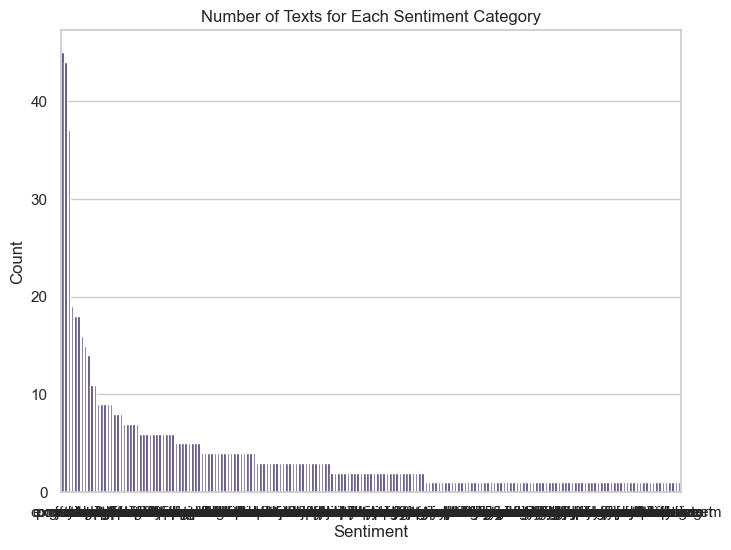

In [62]:
# Count the number of texts in each sentiment category
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)


plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Number of Texts for Each Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Sentiment
positive          45
joy               44
excitement        37
contentment       19
neutral           18
                  ..
lostlove           1
emotionalstorm     1
suffering          1
bittersweet        1
intrigue           1
Name: count, Length: 191, dtype: int64


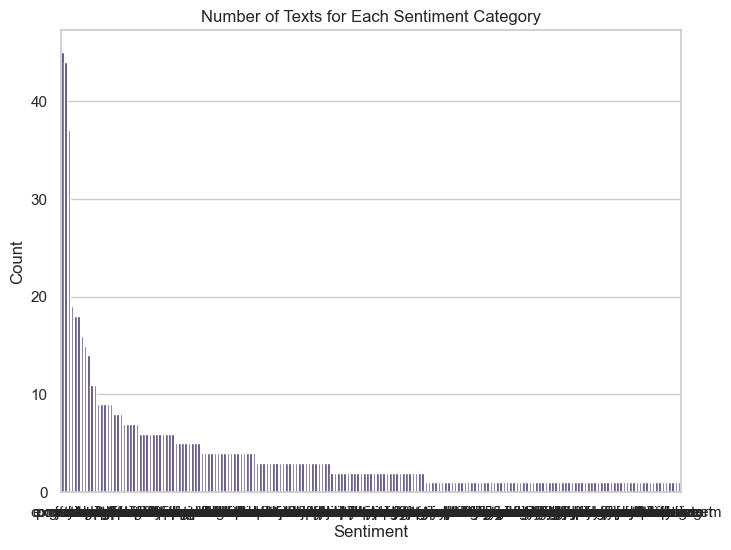

In [86]:

df["Text_Length"] = df["Text"].apply(len)


sentiment_text_length=df.groupby("Sentiment")["Text_Length"].mean().reset_index()


print(sentiment_text_length)



          Sentiment  Text_Length
0        acceptance    72.500000
1    accomplishment    83.000000
2        admiration    77.250000
3         adoration    48.500000
4        adrenaline    60.000000
..              ...          ...
186    winter magic   155.000000
187          wonder    79.333333
188      wonderment    60.000000
189        yearning   117.000000
190            zest   107.000000

[191 rows x 2 columns]


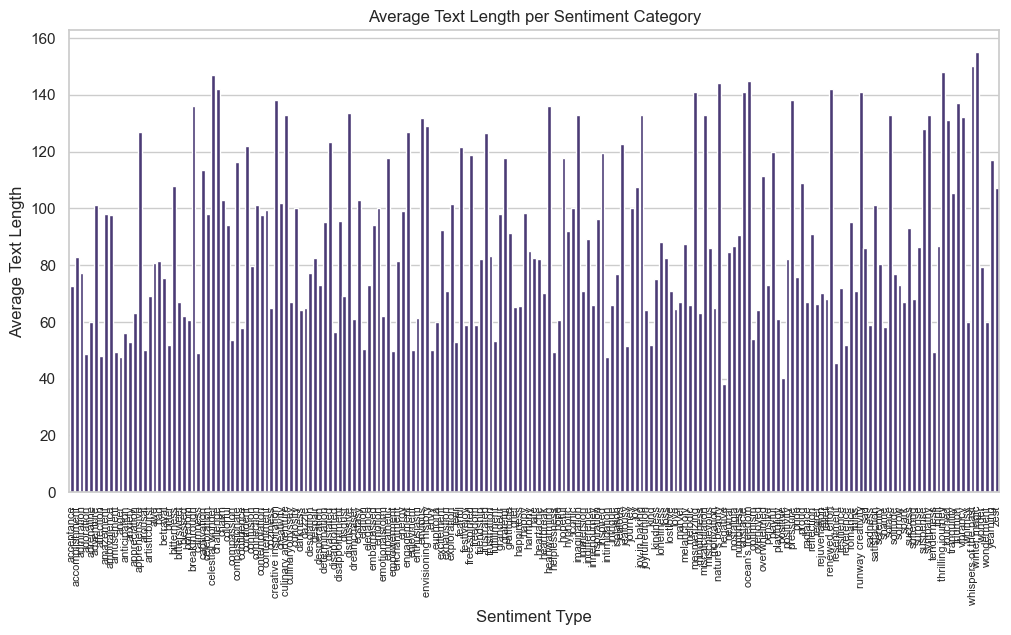

In [94]:

sentiment_text_length = df.groupby("Sentiment")["Text_Length"].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_text_length, x="Sentiment", y="Text_Length")

plt.xlabel("Sentiment Type")
plt.ylabel("Average Text Length")
plt.title("Average Text Length per Sentiment Category")
plt.xticks(rotation=90, fontsize=8)
plt.show()


In [100]:
x=df['Likes'].max()
y=df['Text'].loc[df['Likes'].idxmax()]

In [102]:
x,y

(80, 'thrilled to witness the grandeur of a cultural festival.')

In [104]:
x=df['Retweets'].max()
x

40

In [110]:


y=df['Text'].loc[df['Retweets'].idxmax()]
y

'thrilled to witness the grandeur of a cultural festival.'

In [114]:
y = df.loc[df['Retweets'].idxmax(), ['Text', 'Sentiment']]
y

Text         thrilled to witness the grandeur of a cultural...
Sentiment                                               thrill
Name: 335, dtype: object

<Axes: xlabel='Country'>

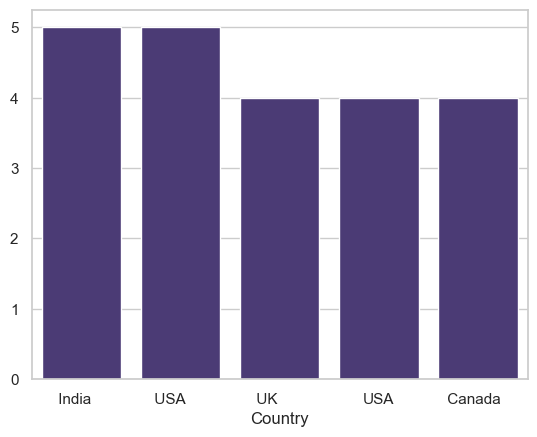

In [140]:

pos=df[df['Sentiment']=='positive']




x1=pos.groupby('Country')['Text'].count().sort_values(ascending=False).head()



sns.barplot(x=x1.index,y=x1.values)


Country
 USA          5
 India        5
 UK           4
 Canada       4
USA           4
Name: count, dtype: int64


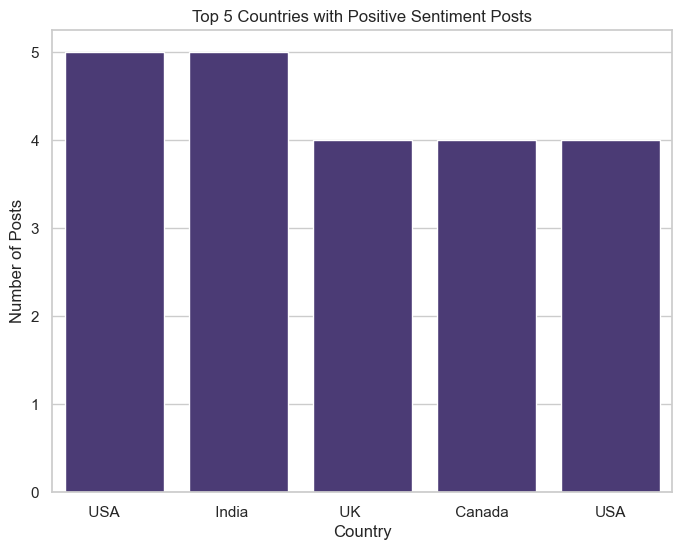

In [138]:
positive_sentiment_df = df[df['Sentiment'] == 'positive']
country_counts = positive_sentiment_df['Country'].value_counts().head(5)

# Display the result
print(country_counts)

# Visualize the top 5 countries
plt.figure(figsize=(8, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 5 Countries with Positive Sentiment Posts')
plt.xlabel('Country')
plt.ylabel('Number of Posts')
plt.show()


In [152]:
travel_posts = df[df['Hashtags'].str.contains('travel', case=False)]
print(travel_posts[['Text', 'Hashtags']])


                                                  Text  \
3          excited about the upcoming weekend getaway!   
72   excitement building up for the upcoming vacation!   
84   enjoying every moment of this trip—pure enjoym...   
145  arousal of excitement before a much-awaited trip.   
596  spontaneously booked a weekend getaway. advent...   
610  embarked on a road trip to revisit cherished p...   
622  embarked on a solo travel adventure, discoveri...   

                                            Hashtags  
3          #Travel #Adventure                         
72       #Excitement #TravelPlans                     
84     #Enjoyment #Travel                             
145   #Arousal #TravelAdventure                       
596                       #GetawayGoals #TeenTravel   
610                  #CherishedPlaces #SeniorTravel   
622                #DiscoverNewPlaces #SeniorTravel   


In [184]:
df1=df[df['Year']==2020]
df2=df1[df1['Sentiment'].str.lower()=='positive']
df2['Likes'].head(5)

Series([], Name: Likes, dtype: int64)

In [158]:
\

                                                  Text  \
3          excited about the upcoming weekend getaway!   
72   excitement building up for the upcoming vacation!   
84   enjoying every moment of this trip—pure enjoym...   
145  arousal of excitement before a much-awaited trip.   
596  spontaneously booked a weekend getaway. advent...   
610  embarked on a road trip to revisit cherished p...   
622  embarked on a solo travel adventure, discoveri...   

                                            Hashtags  
3          #Travel #Adventure                         
72       #Excitement #TravelPlans                     
84     #Enjoyment #Travel                             
145   #Arousal #TravelAdventure                       
596                       #GetawayGoals #TeenTravel   
610                  #CherishedPlaces #SeniorTravel   
622                #DiscoverNewPlaces #SeniorTravel   


In [186]:
df1=df[df['Sentiment']=='Happiness']

,ID,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Text_Length
0,0,enjoying a beautiful day at the park!,positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,37
1,1,traffic was terrible this morning.,negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,34
2,2,just finished an amazing workout! 💪,positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,35
3,3,excited about the upcoming weekend getaway!,positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,43
4,4,trying out a new recipe for dinner tonight.,neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,collaborating on a science project that receiv...,happy,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18,109
728,729,attending a surprise birthday party organized ...,happy,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14,105
729,730,successfully fundraising for a school charity ...,happy,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17,98
730,731,"participating in a multicultural festival, cel...",happy,29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20,103


In [198]:
sentiments = df['Sentiment'].unique()
sentiments.sort()
print(sentiments)


['acceptance' 'accomplishment' 'admiration' 'adoration' 'adrenaline'
 'adventure' 'affection' 'amazement' 'ambivalence' 'amusement' 'anger'
 'anticipation' 'anxiety' 'appreciation' 'apprehensive' 'arousal'
 'artisticburst' 'awe' 'bad' 'betrayal' 'bitter' 'bitterness'
 'bittersweet' 'blessed' 'boredom' 'breakthrough' 'calmness' 'captivation'
 'celebration' 'celestial wonder' 'challenge' 'charm' 'colorful'
 'compassion' 'compassionate' 'confidence' 'confident' 'confusion'
 'connection' 'contemplation' 'contentment' 'coziness'
 'creative inspiration' 'creativity' 'culinary adventure'
 'culinaryodyssey' 'curiosity' 'darkness' 'dazzle' 'desolation' 'despair'
 'desperation' 'determination' 'devastated' 'disappointed'
 'disappointment' 'disgust' 'dismissive' 'dreamchaser' 'ecstasy' 'elation'
 'elegance' 'embarrassed' 'emotion' 'emotionalstorm' 'empathetic'
 'empowerment' 'enchantment' 'energy' 'engagement' 'enjoyment'
 'enthusiasm' 'envious' 'envisioning history' 'envy' 'euphoria'
 'excitemen

In [8]:
import pandas as pd
df=pd.read_csv("sentiment.csv")
happy_posts = df[df['Sentiment'].isin(['happiness', 'happy'])][['User', 'Text']]
print(happy_posts)
happy_posts[['User', 'Text']]

Empty DataFrame
Columns: [User, Text]
Index: []


,User,Text


In [247]:

df['Sentiment'] = df['Sentiment'].str.lower()  # Normalize to lowercase


df_filtered = df[df['Sentiment'].isin(['positive', 'negative', 'neutral'])]



Sentiment          negative  neutral  positive
Year Country                                  
2023  Australia           0        2         2
      Canada              0        5         0
      Canada              0        0         2
      Canada              0        0         1
      Canada              2        0         4
      Canada              0        0         1
      India               0        0         1
      India               0        1         5
      India               0        0         1
      UK                  0        4         0
      UK                  0        0         2
      UK                  0        0         1
      UK                  0        0         4
      UK                  0        0         2
      UK                  0        0         1
      USA                 0        5         1
      USA                 0        0         3
      USA                 0        0         1
      USA                 0        0         1
      USA    

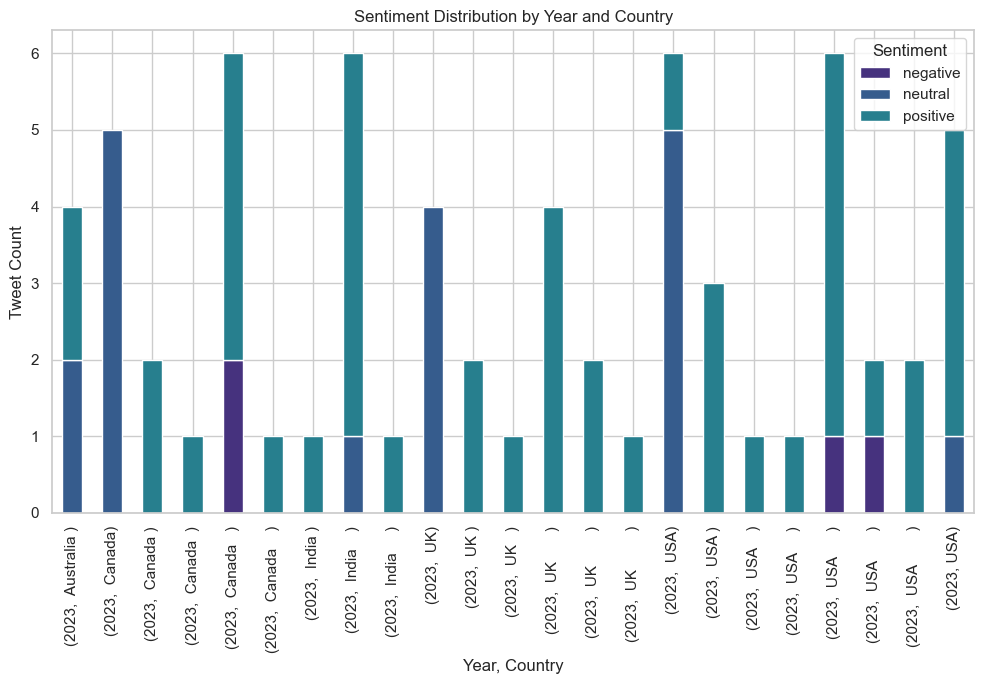

In [251]:
# Group by Year, Country, and Sentiment and count occurrences
grouped = df_filtered.groupby(['Year', 'Country', 'Sentiment']).size().unstack(fill_value=0)
print(grouped)

# Plotting a bar chart for each country and sentiment across years
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sentiment Distribution by Year and Country')
plt.xlabel('Year, Country')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()


Sentiment          negative  neutral  positive
Year Country                                  
2023  Australia           0        2         2
      Canada              0        5         0
      Canada              0        0         2
      Canada              0        0         1
      Canada              2        0         4
      Canada              0        0         1
      India               0        0         1
      India               0        1         5
      India               0        0         1
      UK                  0        4         0
      UK                  0        0         2
      UK                  0        0         1
      UK                  0        0         4
      UK                  0        0         2
      UK                  0        0         1
      USA                 0        5         1
      USA                 0        0         3
      USA                 0        0         1
      USA                 0        0         1
      USA    

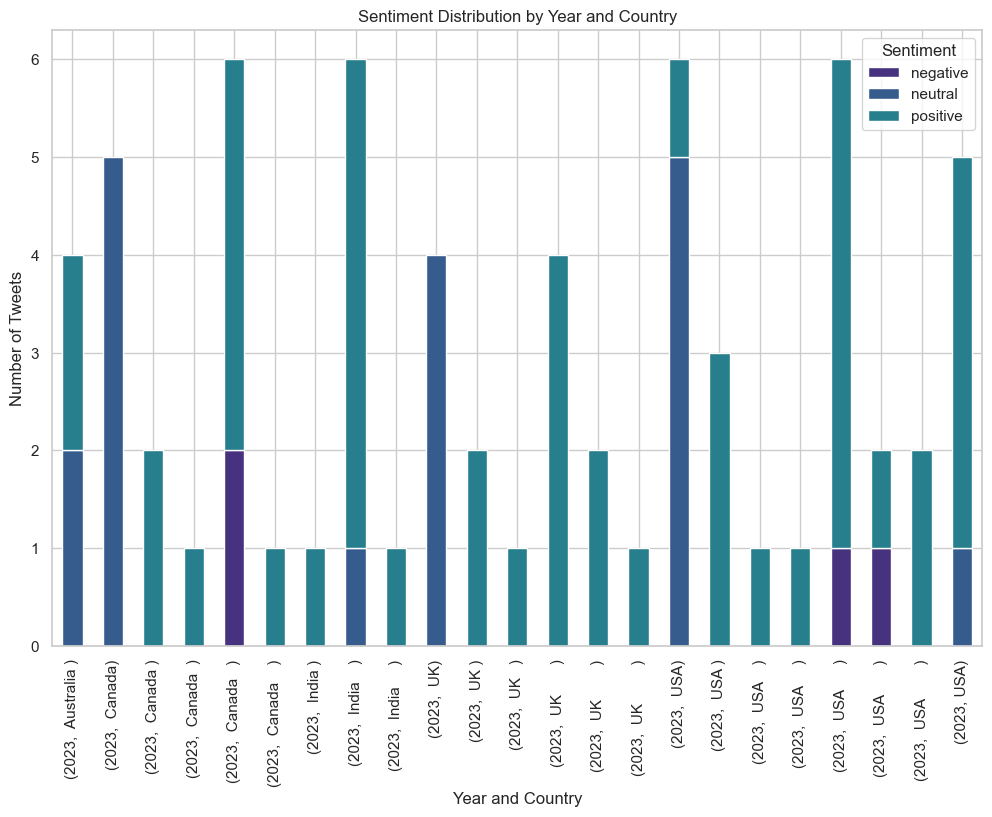

In [259]:
filtered_df = df[df['Sentiment'].isin(['positive', 'negative', 'neutral'])]

# Tabulate the count of tweets per year and country
sentiment_year_country = filtered_df.groupby(['Year', 'Country', 'Sentiment']).size().unstack(fill_value=0)

# Display the result
print(sentiment_year_country)

# Visualize the sentiment distribution by year and country
sentiment_year_country.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by Year and Country')
plt.xlabel('Year and Country')
plt.ylabel('Number of Tweets')
plt.show()


In [261]:
df=pd.read_csv("deliveries.csv")

In [289]:
x1=df.groupby('batting_team')['batsman_runs'].sum().sort_values(ascending=False)
x1


batting_team
Mumbai Indians                 39946
Kolkata Knight Riders          37149
Chennai Super Kings            36739
Royal Challengers Bangalore    35810
Rajasthan Royals               33074
Kings XI Punjab                28541
Sunrisers Hyderabad            27641
Delhi Daredevils               23022
Delhi Capitals                 14229
Deccan Chargers                10885
Punjab Kings                    9042
Gujarat Titans                  7357
Lucknow Super Giants            7081
Pune Warriors                   6040
Gujarat Lions                   4629
Royal Challengers Bengaluru     2789
Rising Pune Supergiant          2370
Rising Pune Supergiants         1962
Kochi Tuskers Kerala            1758
Name: batsman_runs, dtype: int64

In [269]:
print(df.columns)


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


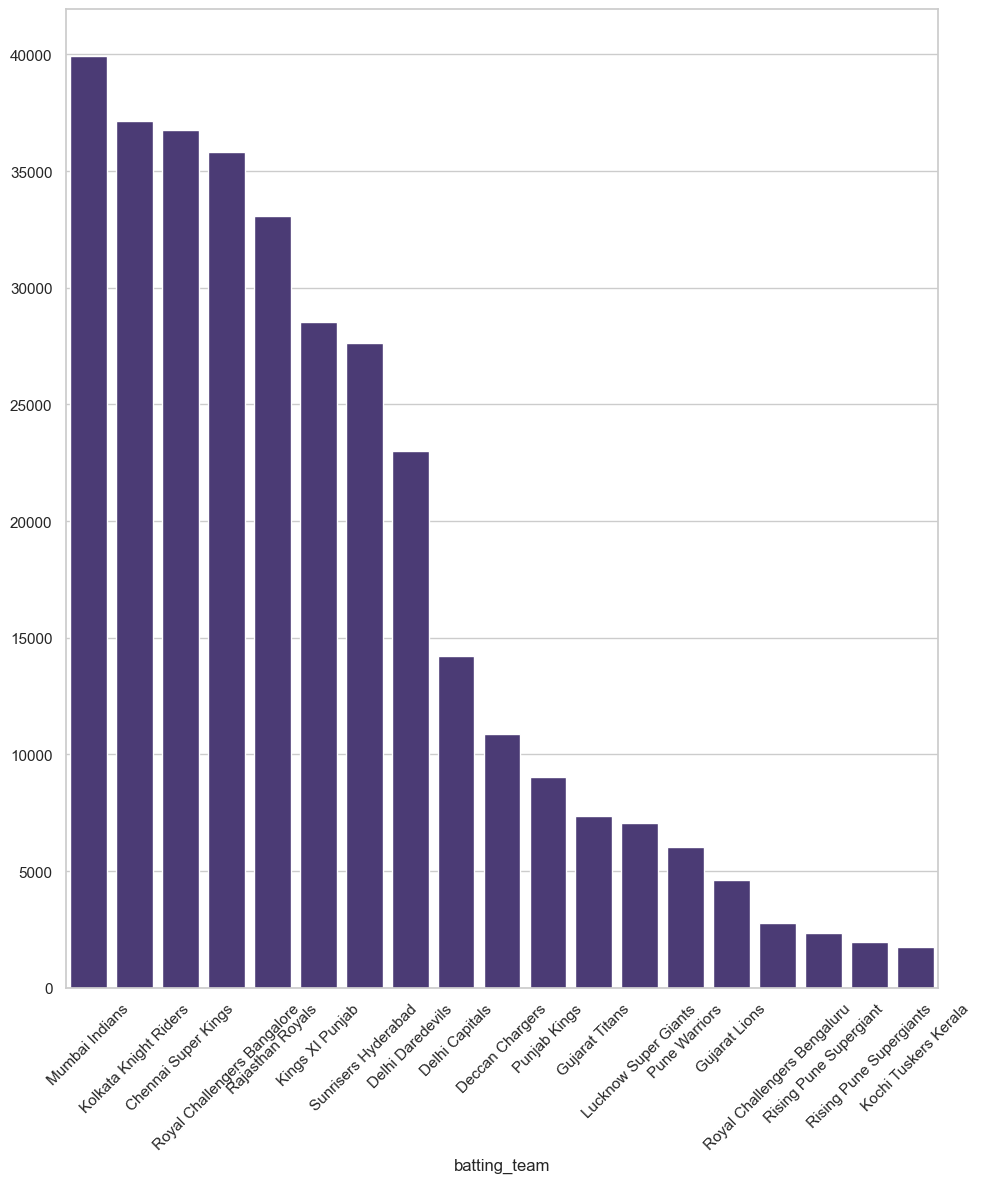

In [307]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
sns.barplot(x=x1.index,y=x1.values)
plt.xticks(rotation=45)
plt.tight_layout()

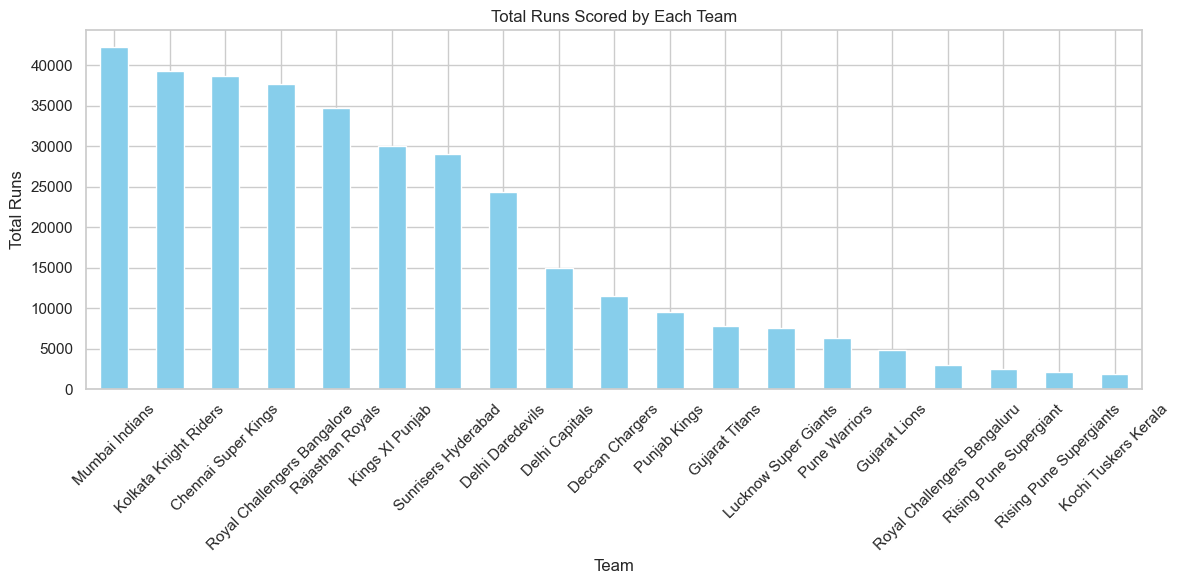

In [309]:
df = pd.read_csv('Deliveries.csv')
team_runs = df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Visualization
team_runs.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [311]:
run=df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

In [313]:
run

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

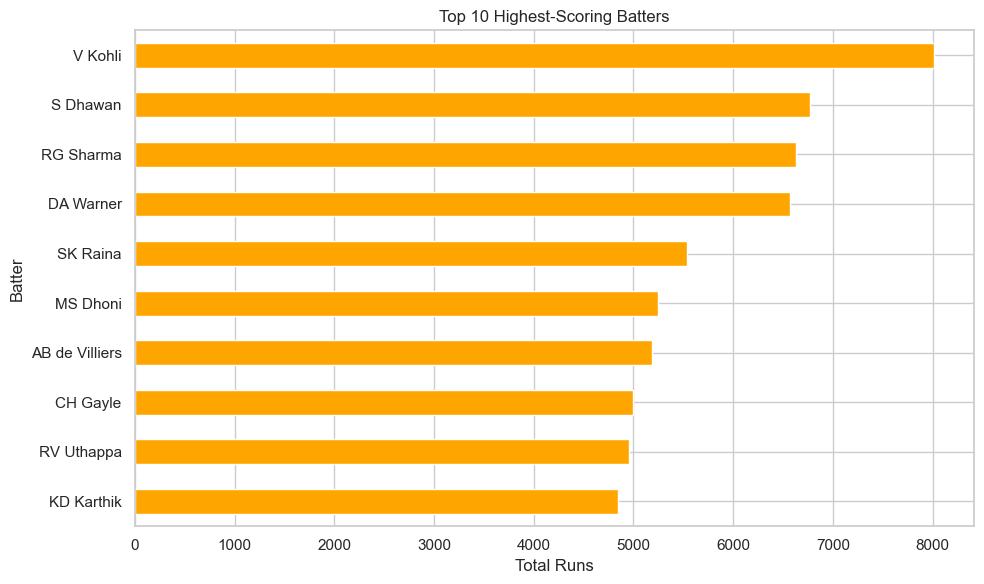

In [327]:
top_batters = df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Visualization
top_batters.plot(kind='barh', figsize=(10,6), color='orange')
plt.title('Top 10 Highest-Scoring Batters')
plt.xlabel('Total Runs')
plt.ylabel('Batter')

plt.tight_layout()
plt.show()


In [342]:
wickets=df.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
#####logic wrong

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64

In [332]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

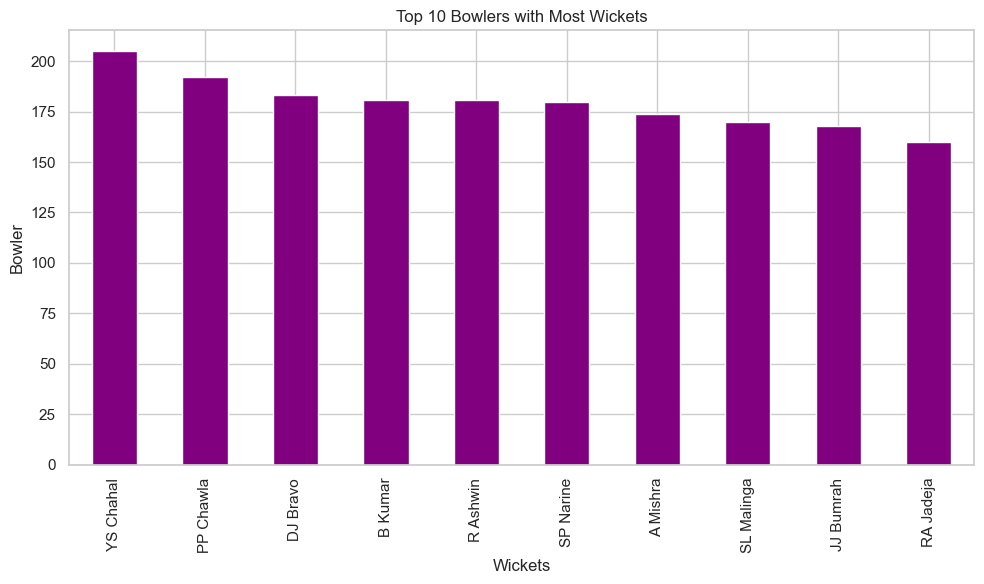

In [348]:
wickets = df[df['is_wicket'] == 1]
top_bowlers = wickets[wickets['dismissal_kind'] != 'run out'].groupby('bowler')['is_wicket'].count().sort_values(ascending=False).head(10)

# Visualization
top_bowlers.plot(kind='bar', figsize=(10,6), color='purple')
plt.title('Top 10 Bowlers with Most Wickets')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()


In [350]:
# Filter out rows where 'is_wicket' is 1 and 'dismissal_kind' is not 'run out'
wickets = df[df['is_wicket'] == 1]
wickets = wickets[wickets['dismissal_kind'] != 'run out']

# Group by 'bowler' and count the number of wickets
top_bowlers = wickets.groupby('bowler')['is_wicket'].count().sort_values(ascending=False).head(10)

top_bowlers


bowler
YS Chahal     205
PP Chawla     192
DJ Bravo      183
B Kumar       181
R Ashwin      181
SP Narine     180
A Mishra      174
SL Malinga    170
JJ Bumrah     168
RA Jadeja     160
Name: is_wicket, dtype: int64

In [364]:
o=df[df['dismissal_kind']=='run out']
out=o.groupby('batter')['dismissal_kind'].count().sort_values(ascending=False)
out

batter
MS Dhoni          25
RG Sharma         20
V Kohli           20
KD Karthik        20
S Dhawan          16
                  ..
Imran Tahir        1
Harpreet Singh     1
HM Amla            1
H Das              1
MJ Clarke          1
Name: dismissal_kind, Length: 348, dtype: int64

In [354]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

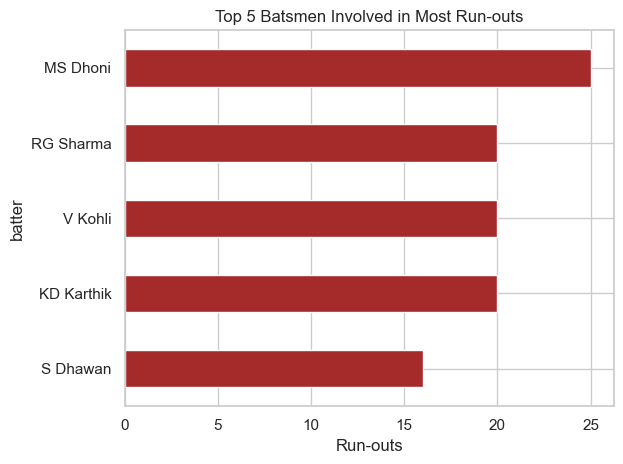

In [366]:
runouts = df[df['dismissal_kind'] == 'run out']
top_runout_batsmen = runouts['batter'].value_counts().head(5)

# Visualization
top_runout_batsmen.plot(kind='barh', color='brown')
plt.title('Top 5 Batsmen Involved in Most Run-outs')
plt.xlabel('Run-outs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



bowling_team
Mumbai Indians                 2295
Royal Challengers Bangalore    2040
Kolkata Knight Riders          1957
Rajasthan Royals               1917
Chennai Super Kings            1842
Kings XI Punjab                1571
Delhi Daredevils               1268
Sunrisers Hyderabad            1254
Delhi Capitals                  725
Deccan Chargers                 659
Punjab Kings                    480
Lucknow Super Giants            386
Pune Warriors                   335
Gujarat Titans                  295
Gujarat Lions                   188
Royal Challengers Bengaluru     151
Rising Pune Supergiant          111
Kochi Tuskers Kerala            110
Rising Pune Supergiants         108
Name: extra_runs, dtype: int64


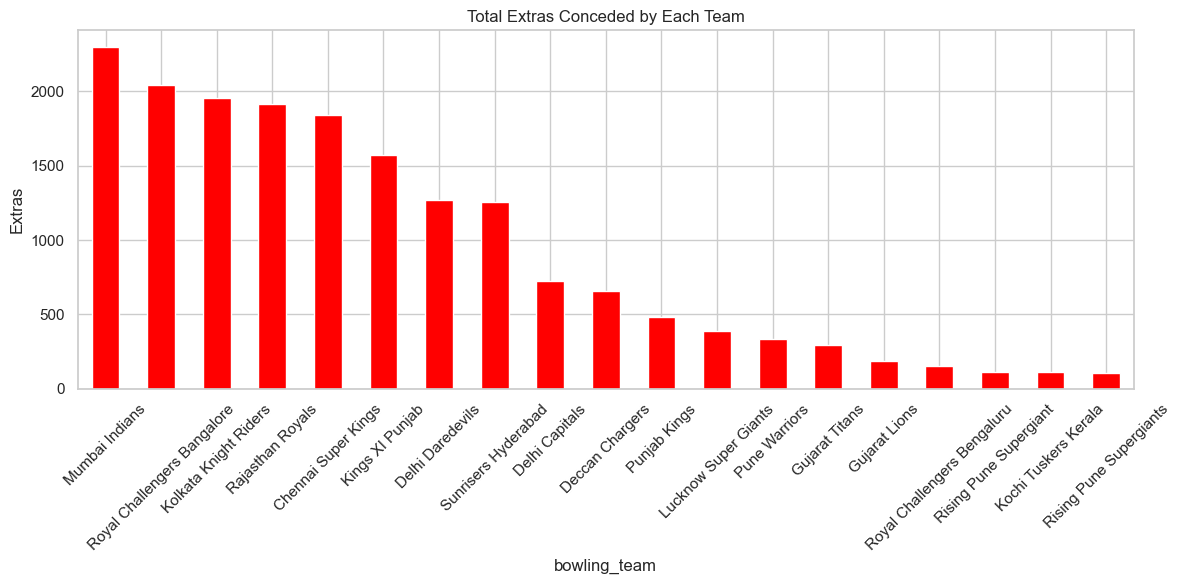

In [368]:
extras = df.groupby('bowling_team')['extra_runs'].sum().sort_values(ascending=False)

# Tabulation + Visualization
print(extras)

extras.plot(kind='bar', figsize=(12,6), color='red')
plt.title('Total Extras Conceded by Each Team')
plt.ylabel('Extras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


<Axes: xlabel='dismissal_kind'>

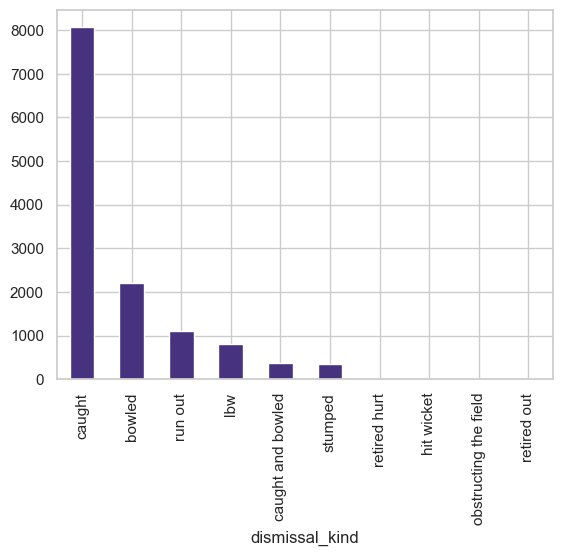

In [380]:
c=df['dismissal_kind'].value_counts()
print(c)
c.plot(kind='bar')

dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


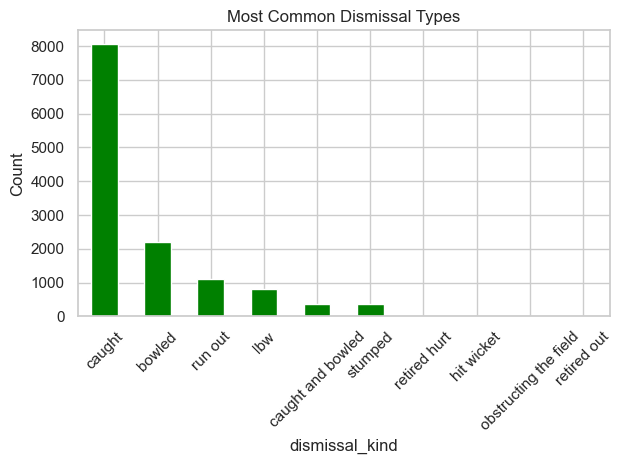

In [382]:
dismissals = df['dismissal_kind'].value_counts()

# Tabulate + Plot
print(dismissals)

dismissals.plot(kind='bar', color='green')
plt.title('Most Common Dismissal Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [517]:
# Load the delivery data (assuming it's in a CSV file named "deliveries.csv")
df = pd.read_csv("deliveries.csv")
over_data = df.groupby(['match_id', 'over'])[['total_runs']].sum()
over_data['balls_bowled'] = 6  # Assuming 6 balls per over
over_data['run_rate'] = over_data['total_runs'] / over_data['balls_bowled'] 
over_data = over_data.reset_index()

# Sort the data by run rate in descending order
over_data = over_data.sort_values(by='run_rate', ascending=False)

# Get the top 3 overs
top_3_overs = over_data.head(3)
 

# Print the result
print(top_3_overs)

       match_id  over  total_runs  balls_bowled  run_rate
20362   1422121    18          52             6  8.666667
20984   1426273     2          52             6  8.666667
15455   1216517     0          51             6  8.500000


In [433]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [519]:


# Group by match_id and over to calculate total runs per over in each match
over_runs = deliveries.groupby(['match_id', 'over'])['total_runs'].sum().reset_index()
print(over_runs)

# Calculate run rate (runs per over)
# Since we're already grouped by over, the run rate is simply the sum of total_runs
over_runs['run_rate'] = over_runs['total_runs']/6

# Sort by run rate in descending order and get the top 3
top_3_overs = over_runs.sort_values(by='run_rate', ascending=False).head(3)

# Display the result
print("Top 3 overs with highest run rates:")
print(top_3_overs[['match_id', 'over', 'run_rate']])



       match_id  over  total_runs
0        335982     0           7
1        335982     1          23
2        335982     2           9
3        335982     3          27
4        335982     4          18
...         ...   ...         ...
21712   1426312    14           0
21713   1426312    15           8
21714   1426312    16          10
21715   1426312    17           5
21716   1426312    18           0

[21717 rows x 3 columns]
Top 3 overs with highest run rates:
       match_id  over  run_rate
20362   1422121    18  8.666667
20984   1426273     2  8.666667
15455   1216517     0  8.500000


Top 5 Batsmen with Most Fours:
      batter  Fours
0   S Dhawan    768
1    V Kohli    708
2  DA Warner    663
3  RG Sharma    599
4   SK Raina    506

Top 5 Batsmen with Most Sixes:
           batter  Sixes
0        CH Gayle    359
1       RG Sharma    281
2         V Kohli    273
3  AB de Villiers    253
4        MS Dhoni    252


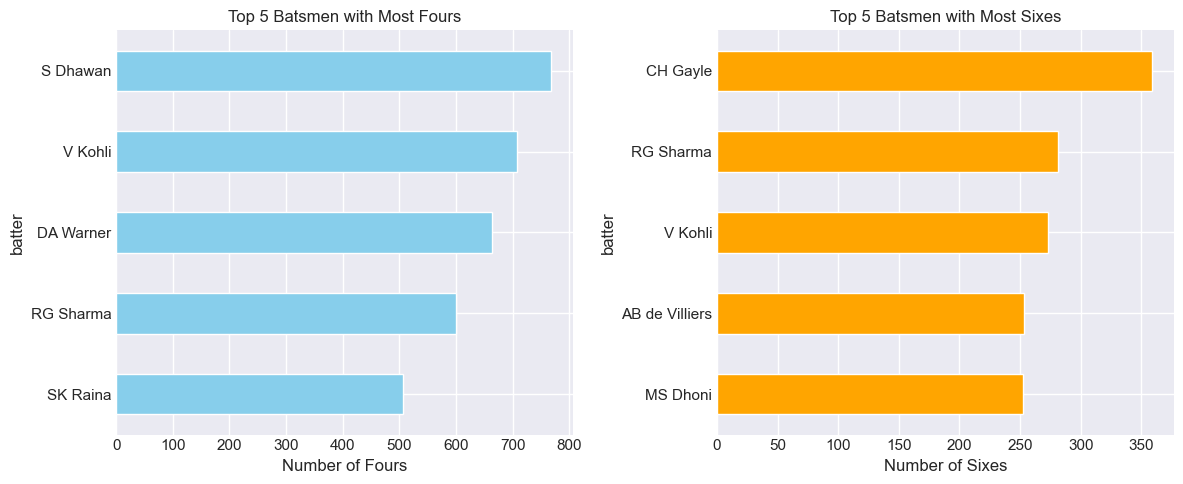

In [498]:
import matplotlib.pyplot as plt

# 1. Filter only fours
fours = df[df['batsman_runs'] == 4]
fours_count = fours.groupby('batter').size().sort_values(ascending=False).head(5)

# 2. Filter only sixes
sixes = df[df['batsman_runs'] == 6]
sixes_count = sixes.groupby('batter').size().sort_values(ascending=False).head(5)

# 3. Tabulate results
top_fours = fours_count.reset_index(name='Fours')
top_sixes = sixes_count.reset_index(name='Sixes')

print("Top 5 Batsmen with Most Fours:")
print(top_fours)
print("\nTop 5 Batsmen with Most Sixes:")
print(top_sixes)

# 4. Plot
plt.figure(figsize=(12, 5))

# Plot Fours
plt.subplot(1, 2, 1)
fours_count.plot(kind='barh', color='skyblue')
plt.title("Top 5 Batsmen with Most Fours")
plt.xlabel("Number of Fours")
plt.gca().invert_yaxis()

# Plot Sixes
plt.subplot(1, 2, 2)
sixes_count.plot(kind='barh', color='orange')
plt.title("Top 5 Batsmen with Most Sixes")
plt.xlabel("Number of Sixes")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [500]:
print(fours_count)

batter
S Dhawan     768
V Kohli      708
DA Warner    663
RG Sharma    599
SK Raina     506
dtype: int64


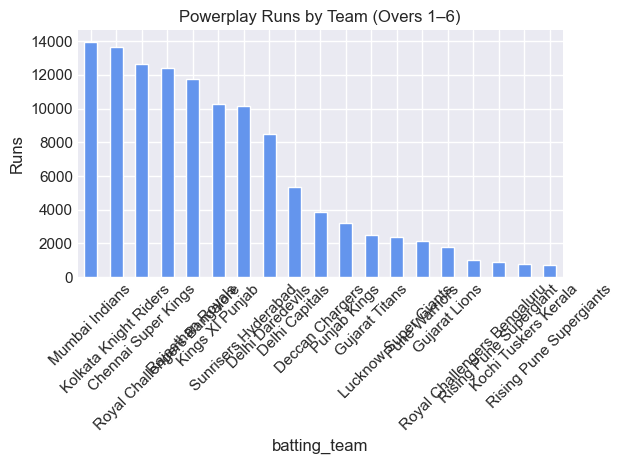

In [504]:
powerplay = df[df['over'] <= 6]
pp_runs = powerplay.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

pp_runs.plot(kind='bar', color='cornflowerblue')
plt.title('Powerplay Runs by Team (Overs 1–6)')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [506]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for powerplay (first 6 overs)
powerplay_df = df[df['over'] < 6]

# 1. Total Runs in Powerplay by Team
runs_by_team = powerplay_df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# 2. Wickets in Powerplay by Team
wickets_by_team = powerplay_df[powerplay_df['is_wicket'] == 1].groupby('batting_team')['is_wicket'].count().sort_values(ascending=False)

# 3. Average Run Rate in Powerplay
# Find how many overs each team has played in powerplay (each match = 6 overs)
powerplay_overs = powerplay_df.groupby(['match_id', 'batting_team'])['over'].nunique().reset_index()
powerplay_overs['total_overs'] = powerplay_overs['over']

# Merge overs with total runs
total_runs = powerplay_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
merged = pd.merge(total_runs, powerplay_overs, on=['match_id', 'batting_team'])
merged['run_rate'] = merged['total_runs'] / merged['total_overs']

# Avg run rate by team
run_rate_by_team = merged.groupby('batting_team')['run_rate'].mean().sort_values(ascending=False)


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_49423/1730714952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_by_team.index, y=runs_by_team.values, palette='viridis')


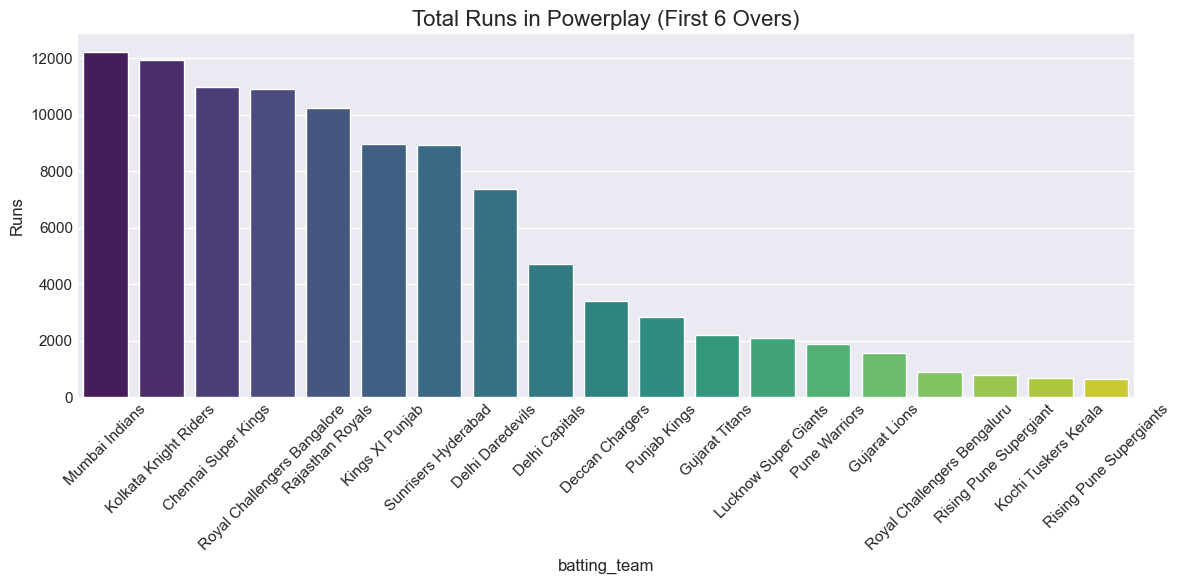

In [509]:
plt.figure(figsize=(12,6))
sns.barplot(x=runs_by_team.index, y=runs_by_team.values, palette='viridis')
plt.title('Total Runs in Powerplay (First 6 Overs)', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Runs')
plt.tight_layout()
plt.show()


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_49423/1233498135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_by_team.index, y=wickets_by_team.values, palette='rocket')


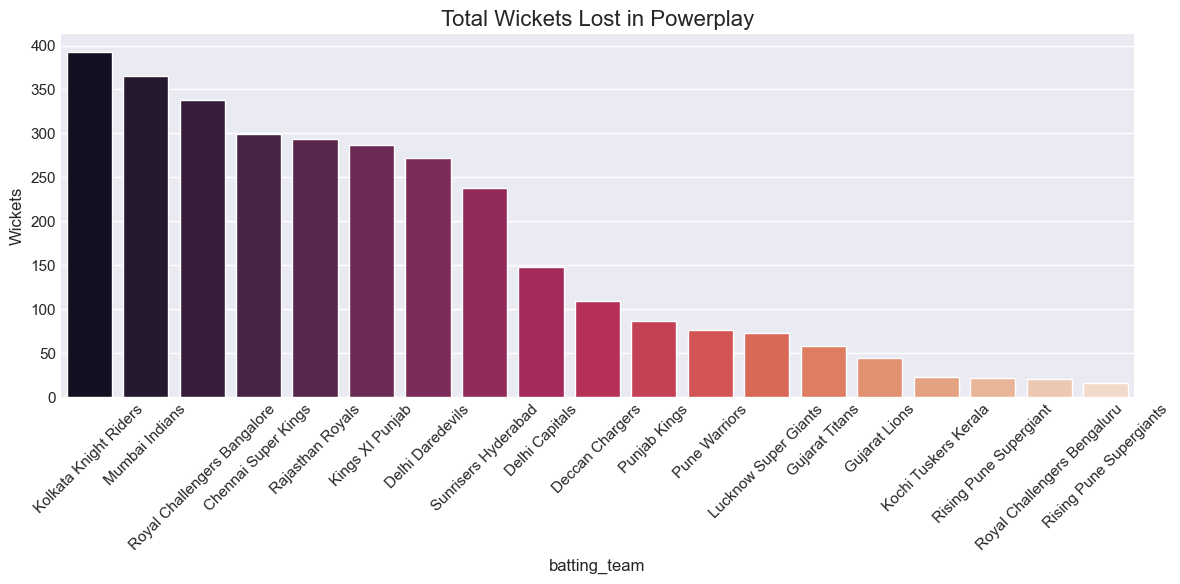

In [511]:
plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_team.index, y=wickets_by_team.values, palette='rocket')
plt.title('Total Wickets Lost in Powerplay', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Wickets')
plt.tight_layout()
plt.show()


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_49423/913025094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=run_rate_by_team.index, y=run_rate_by_team.values, palette='magma')


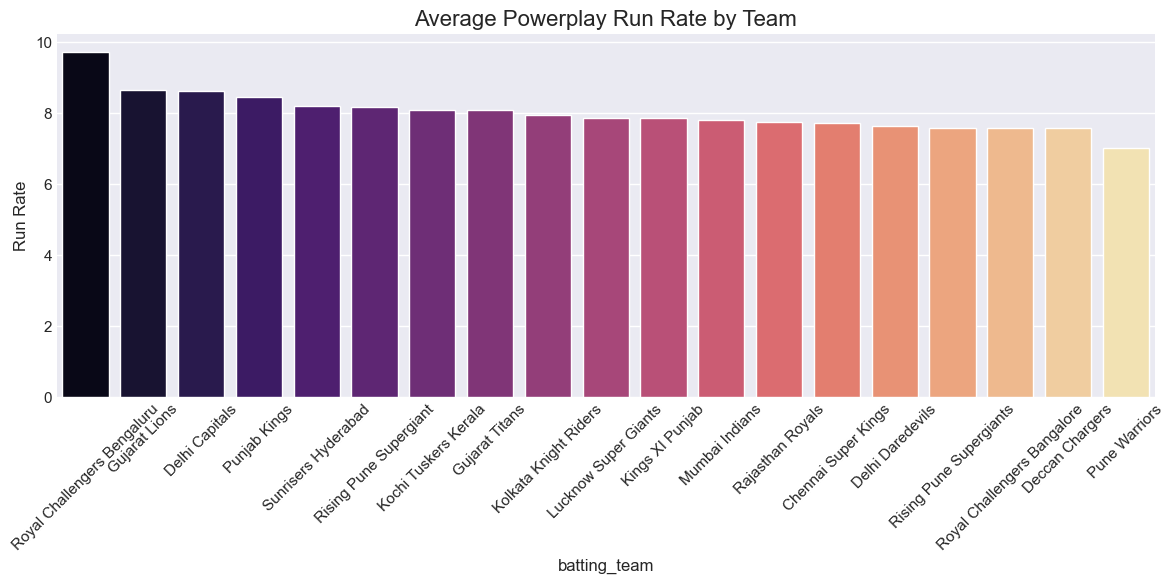

In [513]:
plt.figure(figsize=(12,6))
sns.barplot(x=run_rate_by_team.index, y=run_rate_by_team.values, palette='magma')
plt.title('Average Powerplay Run Rate by Team', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Run Rate')
plt.tight_layout()
plt.show()


In [515]:
# Group the data by match and over
over_runs = df.groupby(['match_id', 'over'])['total_runs'].sum().reset_index()

# Calculate the run rate for each over
over_runs['run_rate'] = over_runs['total_runs'] / 6  # Since each over has 6 balls

# Sort by run rate to get the highest run rate overs
top_overs = over_runs.sort_values(by='run_rate', ascending=False).head(3)

# Display the top 3 overs with the highest run rate
top_overs


,match_id,over,total_runs,run_rate
20362,1422121,18,52,8.666667
20984,1426273,2,52,8.666667
15455,1216517,0,51,8.500000


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_49423/147285292.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=total_runs_powerplay, x='batting_team', y='run_rate', palette='Set2')


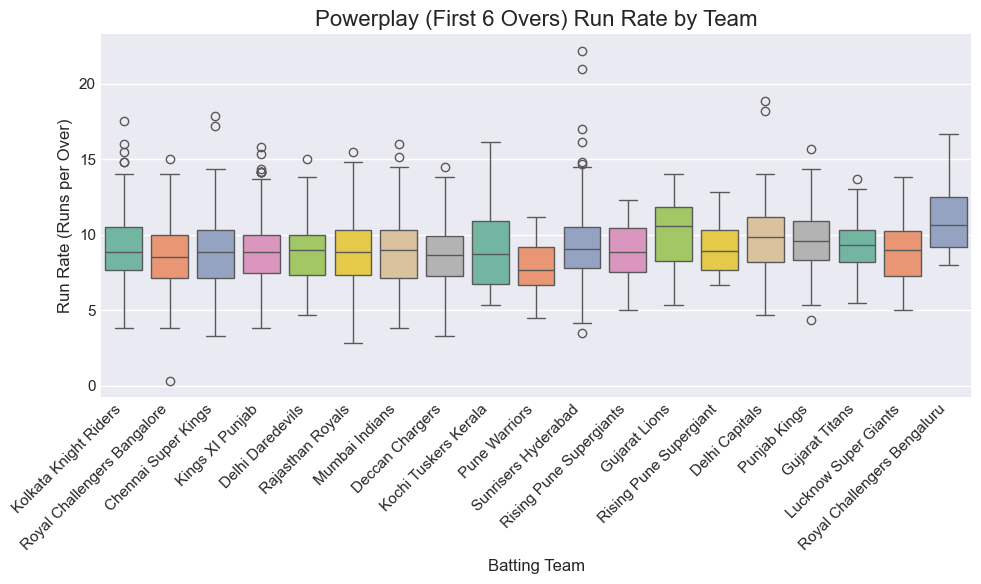

In [523]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter the dataset for the first 6 overs (Powerplay)
powerplay_df = deliveries[deliveries['over'] <= 6]

# 2. Group by match_id and batting_team to calculate total runs scored in the first 6 overs (Powerplay)
total_runs_powerplay = powerplay_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# 3. Calculate the run rate for the first 6 overs (since each match has 6 overs in Powerplay)
total_runs_powerplay['run_rate'] = total_runs_powerplay['total_runs'] / 6

# 4. Plotting the Powerplay Run Rate for each team across all matches
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_runs_powerplay, x='batting_team', y='run_rate', palette='Set2')

# Customizing the plot
plt.title('Powerplay (First 6 Overs) Run Rate by Team', fontsize=16)
plt.xlabel('Batting Team', fontsize=12)
plt.ylabel('Run Rate (Runs per Over)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# 5. Optionally: Display the average run rate by


NameError: name 'pd' is not defined